# Analysis of heterogeneous ABM - NO NETWORK

Assumes a well-mixed heterogeneous population in which agents communicate and observe behaviour of all other agents.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import cProfile
import pstats
import mesa
pd.set_option('display.max_colwidth', 10000)
import joblib
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_3486/2138495846.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#from model import ConsumatModel
from model_heterogeneous_experiments import ConsumatModel

In [3]:
#Import KDE models

kde_modeks = {
    'ccrdprs': joblib.load('saved_data/kde_ccrdprs.pkl'),
    'gvsrdcc': joblib.load('saved_data/kde_gvsrdcc.pkl'),
    'hincfel': joblib.load('saved_data/kde_hincfel.pkl'),
    'impenv': joblib.load('saved_data/kde_impenv.pkl'),
    'impfree': joblib.load('saved_data/kde_impfree.pkl'),
    'imprich': joblib.load('saved_data/kde_imprich.pkl'),
    'inctxff': joblib.load('saved_data/kde_inctxff.pkl'),
    'inprdsc': joblib.load('saved_data/kde_inprdsc.pkl'),
    'ipfrule': joblib.load('saved_data/kde_ipfrule.pkl'),
    'iplylfr': joblib.load('saved_data/kde_iplylfr.pkl'),
    'lkredcc': joblib.load('saved_data/kde_lkredcc.pkl'),
    'sclmeet': joblib.load('saved_data/kde_sclmeet.pkl'),
    'wrclmch': joblib.load('saved_data/kde_wrclmch.pkl'),
    'wrkctra': joblib.load('saved_data/kde_wrkctra.pkl')
}

In [4]:
base_config = {
    'TP_percentage': 0.8,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': 'saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}



In [5]:
def run_simulation(model, num_steps):
    # List to store True Price Adoption Rates
    adoption_rates = []

    # Run the model for a specified number of steps with tqdm for progress tracking
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        # Calculate and append the current adoption rate to the list
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)

    # Retrieve collected data from the model's DataCollector
    model_data = model.datacollector.get_model_vars_dataframe()
    # Append the adoption rates to the DataFrame
    model_data['Adoption Rates'] = adoption_rates  # Ensure this matches how you collect data in DataCollector

    return model_data


In [6]:
model = ConsumatModel(base_config)
num_steps = 30
model_data = run_simulation(model, num_steps)
print(model_data)


Simulation Progress:   0%|          | 0/30 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous_experiments.py:109: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]

                     True_Price_Adoption_by_Class  Adoption Rates
0     {'lower': 0.0, 'middle': 0.0, 'upper': 0.0}             0.0
1     {'lower': 0.0, 'middle': 0.0, 'upper': 0.0}             0.0
2     {'lower': 0.0, 'middle': 0.0, 'upper': 0.0}             0.0
3   {'lower': 42.5, 'middle': 43.7, 'upper': 5.7}            91.9
4   {'lower': 37.4, 'middle': 36.7, 'upper': 4.7}            78.8
5   {'lower': 42.3, 'middle': 39.9, 'upper': 5.3}            87.5
6   {'lower': 42.9, 'middle': 40.1, 'upper': 5.3}            88.3
7   {'lower': 43.0, 'middle': 40.3, 'upper': 5.4}            88.7
8   {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
9   {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
10  {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
11  {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
12  {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
13  {'lower': 43.2, 'middle': 40.4, 'upper': 5.4}            89.0
14  {'lowe

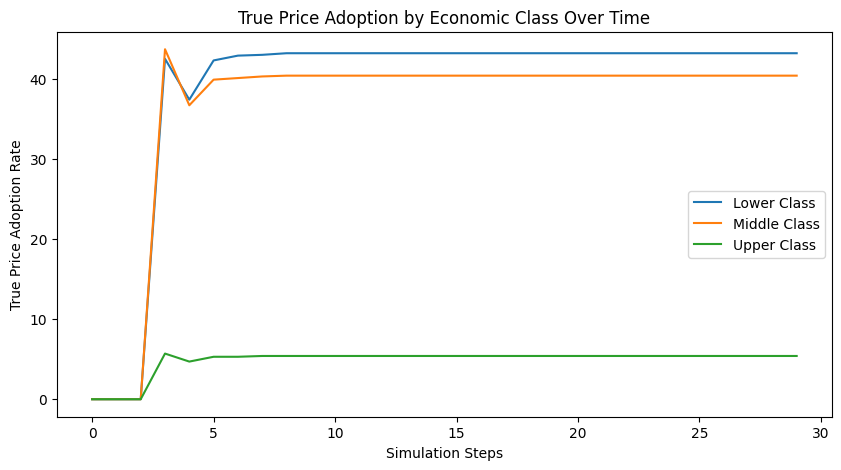

In [7]:
model_data = model.datacollector.get_model_vars_dataframe()

model_data[['lower_class', 'middle_class', 'upper_class']] = model_data['True_Price_Adoption_by_Class'].apply(pd.Series)

# Now plot each class's adoption rate over time
plt.figure(figsize=(10, 5))
plt.plot(model_data['lower_class'], label='Lower Class')
plt.plot(model_data['middle_class'], label='Middle Class')
plt.plot(model_data['upper_class'], label='Upper Class')
plt.title('True Price Adoption by Economic Class Over Time')
plt.xlabel('Simulation Steps')
plt.ylabel('True Price Adoption Rate')
plt.legend()
plt.show()

### Product distribution before and after

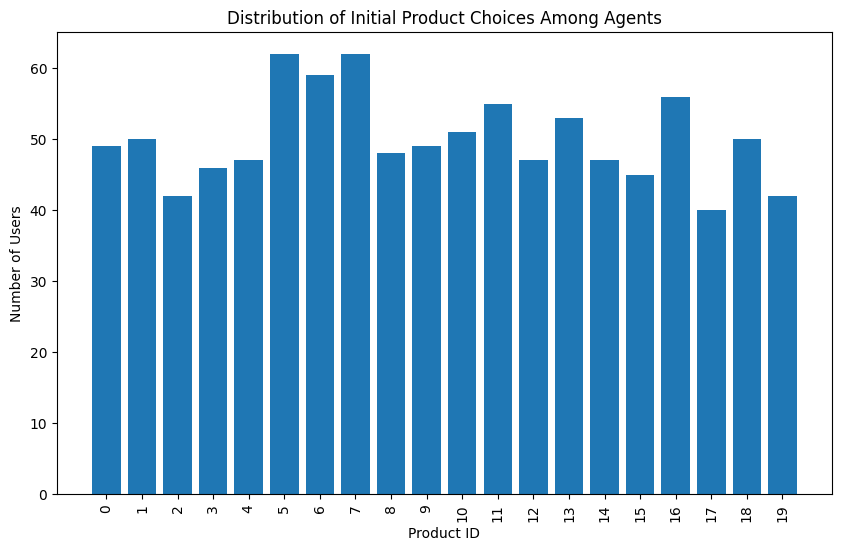

Iteration 1: True Price Adoption Rate = 0.0%
Iteration 2: True Price Adoption Rate = 0.0%
Iteration 3: True Price Adoption Rate = 0.0%
Introducing 14 True Price products.
Iteration 4: True Price Adoption Rate = 97.39999999999999%
Iteration 5: True Price Adoption Rate = 96.7%
Iteration 6: True Price Adoption Rate = 97.6%
Iteration 7: True Price Adoption Rate = 97.0%
Iteration 8: True Price Adoption Rate = 97.39999999999999%
Iteration 9: True Price Adoption Rate = 96.8%
Iteration 10: True Price Adoption Rate = 97.0%
Iteration 11: True Price Adoption Rate = 97.3%
Iteration 12: True Price Adoption Rate = 97.3%
Iteration 13: True Price Adoption Rate = 96.5%
Iteration 14: True Price Adoption Rate = 97.39999999999999%
Iteration 15: True Price Adoption Rate = 97.2%
Iteration 16: True Price Adoption Rate = 97.3%
Iteration 17: True Price Adoption Rate = 97.0%
Iteration 18: True Price Adoption Rate = 97.5%
Iteration 19: True Price Adoption Rate = 96.8%
Iteration 20: True Price Adoption Rate = 97.

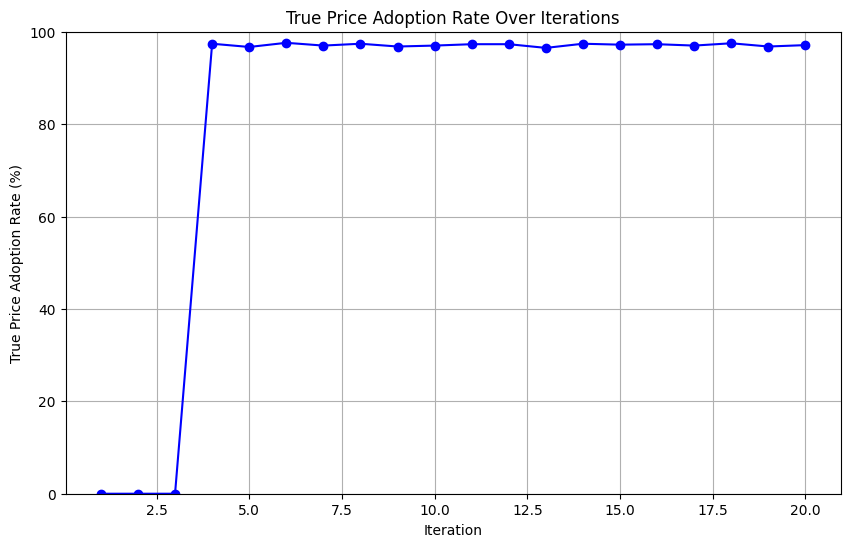

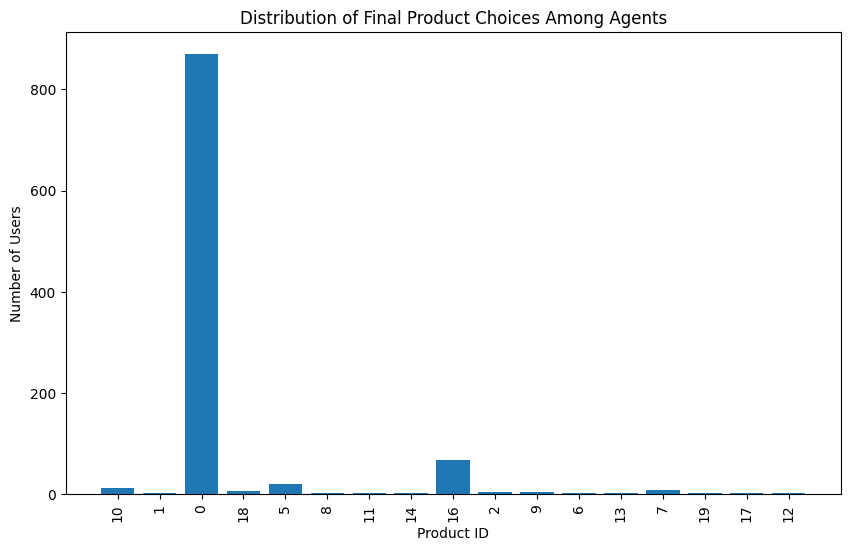

In [ ]:
# Set the number of steps you wish to simulate
num_steps = 20

# Initialize your model
model = ConsumatModel(config)

# Visualization code for initial product distribution
initial_product_usage_counts = Counter([agent.last_purchased_product.product_id for agent in model.agents if agent.last_purchased_product])

# Sorting products by their IDs for consistent plotting
sorted_initial_product_ids = sorted(initial_product_usage_counts.keys())
sorted_initial_counts = [initial_product_usage_counts[pid] for pid in sorted_initial_product_ids]

# Visualization of Initial Product Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_initial_product_ids)), sorted_initial_counts, tick_label=sorted_initial_product_ids)
plt.xlabel('Product ID')
plt.ylabel('Number of Users')
plt.title('Distribution of Initial Product Choices Among Agents')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.show()

# Run the model for a specified number of steps and get adoption rates
adoption_rates = run_simulation(model, num_steps)

# Plotting the True Price Adoption Rates after running the model
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps+1), adoption_rates, marker='o', color='b')
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# Visualization code for final product distribution
final_product_usage_counts = Counter([agent.last_purchased_product.product_id for agent in model.agents if agent.last_purchased_product])

# Visualization of Final Product Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(final_product_usage_counts)), final_product_usage_counts.values(), tick_label=list(final_product_usage_counts.keys()))
plt.xlabel('Product ID')
plt.ylabel('Number of Users')
plt.title('Distribution of Final Product Choices Among Agents')
plt.xticks(rotation=90)
plt.show()


How many agents choose each strategy per step:

In [13]:
model_data = model.datacollector.get_agent_vars_dataframe()
decision_modes_count = model_data.groupby('Step').sum()[['Repeat', 'Imitate', 'Deliberate', 'Social_Compare']]
print(decision_modes_count)

Empty DataFrame
Columns: [Repeat, Imitate, Deliberate, Social_Compare]
Index: []


### Distribution of agent attributes:

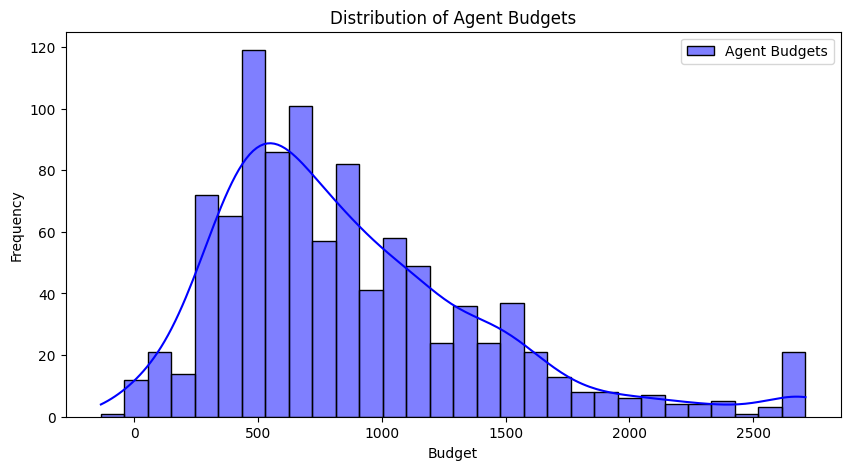

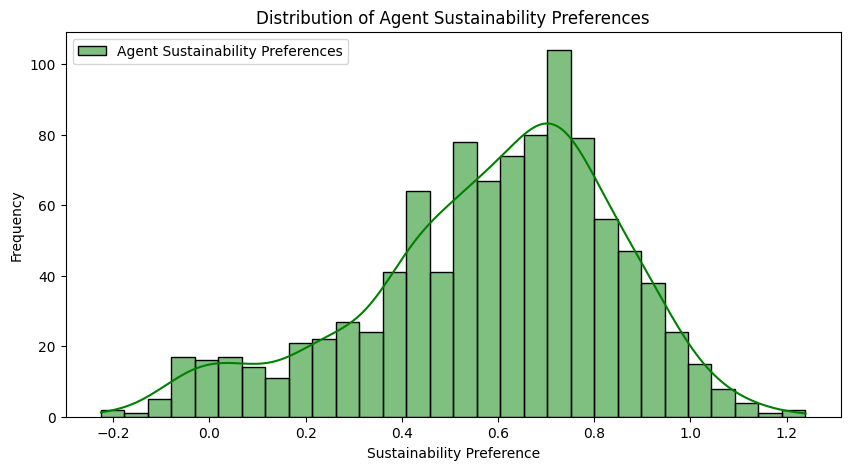

In [ ]:
# Collect agent attributes
agent_budgets = [agent.budget for agent in model.agents]
agent_sustainability_preferences = [agent.preference_sustainability for agent in model.agents]

# Visualization code here
# Plot for Budget Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_budgets, bins=30, kde=True, color='blue', label='Agent Budgets')
plt.title('Distribution of Agent Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot for Sustainability Preferences Distribution
plt.figure(figsize=(10, 5))
sns.histplot(agent_sustainability_preferences, bins=30, kde=True, color='green', label='Agent Sustainability Preferences')
plt.title('Distribution of Agent Sustainability Preferences')
plt.xlabel('Sustainability Preference')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Multiple runs of the same model:

Simulation Progress:   0%|          | 0/20 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/20 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/20 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/20 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * s

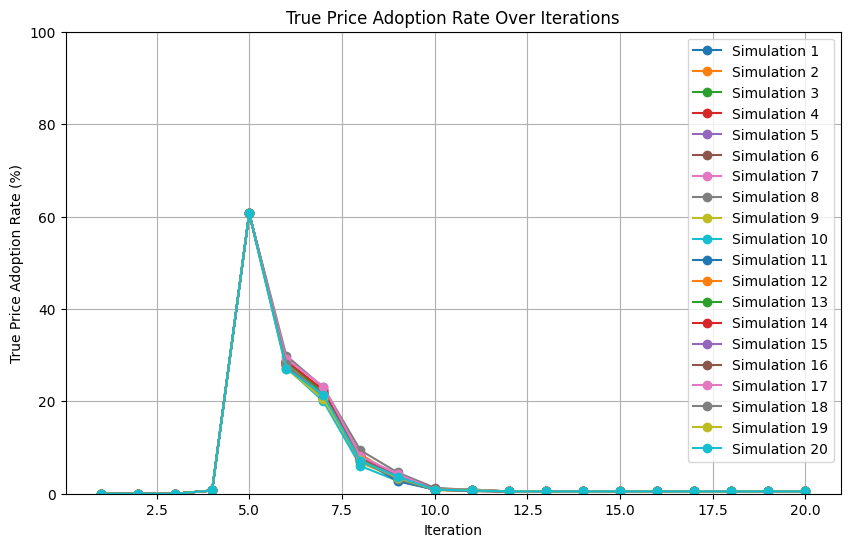

In [39]:
base_config = {
    'TP_percentage': 0.7,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': 'saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}


# Number of simulations
num_simulations = 20

# Number of steps per simulation
num_steps = 20

# Initialize a figure
plt.figure(figsize=(10, 6))

# Loop over the number of simulations
for simulation in range(num_simulations):
    # Initialize your model
    model = ConsumatModel(base_config)
    
    # Run the model for a specified number of steps and collect adoption rates
    adoption_rates = run_simulation(model, num_steps)
    
    # Plotting the results for the current simulation
    plt.plot(range(1, num_steps + 1), adoption_rates, marker='o', label=f'Simulation {simulation+1}')

# Finalizing the plot
plt.title('True Price Adoption Rate Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.show()

### Vary True Price percentage

Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * s

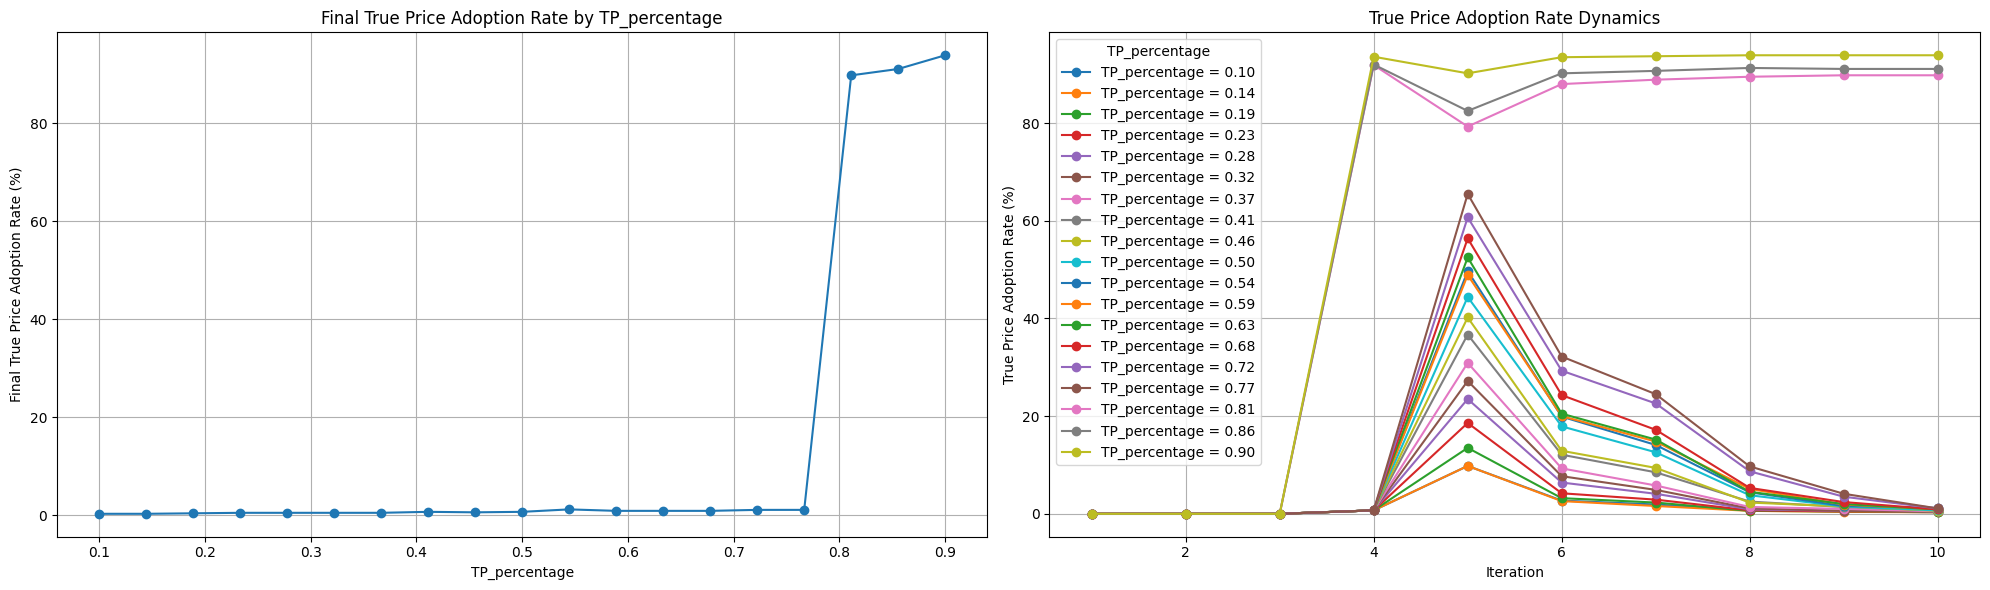

In [35]:
# Define TP percentages and simulation steps
tp_percentages = np.linspace(0.1, 0.9, 19)  # From 10% to 90%
num_steps = 10

# Prepare figure for plotting
plt.figure(figsize=(20, 6))

# Store final adoption rates and all adoption rates for plotting
final_adoption_rates = []
all_adoption_rates = []

# Run the simulation for each TP_percentage
for tp_percentage in tp_percentages:
    base_config['TP_percentage'] = tp_percentage
    model = ConsumatModel(base_config)
    model_data = run_simulation(model, num_steps)
    
    # Collect data for the plots
    final_adoption_rates.append(model_data['Adoption Rates'].iloc[-1])
    all_adoption_rates.append(model_data['Adoption Rates'].values)

# Plot 1: Final Adoption Rate by TP_percentage
plt.subplot(1, 2, 1)
plt.plot(tp_percentages, final_adoption_rates, marker='o')
plt.title('Final True Price Adoption Rate by TP_percentage')
plt.xlabel('TP_percentage')
plt.ylabel('Final True Price Adoption Rate (%)')
plt.grid(True)

# Plot 2: Adoption Rate Dynamics by TP_percentage
plt.subplot(1, 2, 2)
for i, rates in enumerate(all_adoption_rates):
    plt.plot(range(1, num_steps + 1), rates, label=f'TP_percentage = {tp_percentages[i]:.2f}', marker='o')

plt.title('True Price Adoption Rate Dynamics')
plt.xlabel('Iteration')
plt.ylabel('True Price Adoption Rate (%)')
plt.legend(title='TP_percentage')
plt.grid(True)

plt.tight_layout()
plt.show()

## Global Sensitivity Analysis

Sobol indices

Saltelli sampling


In [18]:
base_config = {
    'TP_percentage': 0.8,
    'satisfaction_threshold': 0.5,
    'uncertainty_threshold': 0.5,
    'kde_models_dir': 'saved_data/',
    'product_price_range': (5, 10),
    'min_increase_percentage': 4,
    'max_increase_percentage': 10,
    'num_products': 20,
    'inflation_rate': 3,
    'num_agents': 1000, 
    'seed': 42  # Seed for reproducibility
}



problem = {
    'num_vars': 5,
    'names': ['TP_percentage',
              'product_price_low', 'product_price_high', 'min_increase_percentage',
              'max_increase_percentage'],
    'bounds': [
        [0.5, 1],   # TP_percentage
        [4, 6],     # product_price_low
        [9, 11],    # product_price_high
        [2, 6],     # min_increase_percentage
        [8, 12],    # max_increase_percentage
    ]
}

def run_simulation(params, num_steps=10):
    config = base_config.copy()
    config.update({
        'TP_percentage': params[0],
        'product_price_range': (params[1], params[2]),
        'min_increase_percentage': params[3],
        'max_increase_percentage': params[4]
    })
    model = ConsumatModel(config)
    adoption_rates = []
    for _ in tqdm(range(num_steps), desc='Simulation Progress'):
        model.step()
        current_adoption_rate = model.calculate_true_price_adoption_rate()
        adoption_rates.append(current_adoption_rate)
    return adoption_rates[-1]

param_values = saltelli.sample(problem, 48)
Y = np.array([run_simulation(params) for params in param_values])

Si = sobol.analyze(problem, Y)
print("First order Sobol indices:", Si['S1'])
print("Total order Sobol indices:", Si['ST'])

/var/folders/53/cl5y6r2x7n5_942j6h59yyh00000gn/T/ipykernel_97899/1873497020.py:47: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 48)
/Users/isabelklennert/opt/anaconda3/envs/thesisenv/lib/python3.9/site-packages/SALib/sample/saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (48) is equal to `2^n`.
        
  warnings.warn(msg)
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformity) ** 0.5))
Simulation Progress:   0%|          | 0/10 [00:00<?, ?it/s]/Applications/UNI/Thesis/model_heterogeneous.py:108: RuntimeWarning: invalid value encountered in scalar power
  self.S_satisfaction = max(0, min(1, (conformity * self.preference_conformi

First order Sobol indices: [ 1.37650411e+00 -4.22318861e-04  1.07027338e-03  4.51604353e-04
  1.96948647e-03]
Total order Sobol indices: [1.37878460e+00 7.13342138e-05 4.35098741e-05 2.22794533e-05
 3.66661855e-05]


In [19]:
print(Si)

{'S1': array([ 1.37650411e+00, -4.22318861e-04,  1.07027338e-03,  4.51604353e-04,
        1.96948647e-03]), 'S1_conf': array([0.2648337 , 0.00297009, 0.00250521, 0.00173636, 0.00241065]), 'ST': array([1.37878460e+00, 7.13342138e-05, 4.35098741e-05, 2.22794533e-05,
       3.66661855e-05]), 'ST_conf': array([2.51322792e-01, 4.98253918e-05, 3.66960856e-05, 1.21675882e-05,
       2.35979396e-05]), 'S2': array([[       nan, 0.00897384, 0.00390212, 0.00450376, 0.00135606],
       [       nan,        nan, 0.00223688, 0.00220501, 0.0022237 ],
       [       nan,        nan,        nan, 0.00147759, 0.00147479],
       [       nan,        nan,        nan,        nan, 0.00169072],
       [       nan,        nan,        nan,        nan,        nan]]), 'S2_conf': array([[       nan, 0.17467408, 0.17245098, 0.1733005 , 0.17183051],
       [       nan,        nan, 0.00370114, 0.00368278, 0.00368805],
       [       nan,        nan,        nan, 0.00384682, 0.00384706],
       [       nan,        nan, 

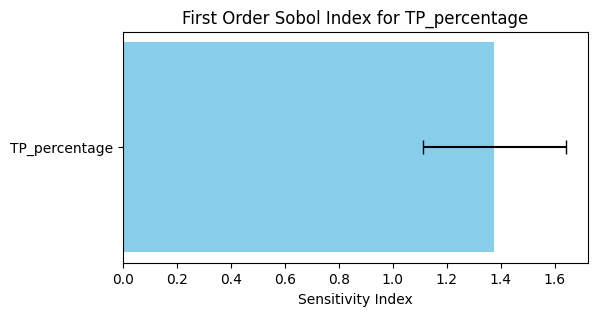

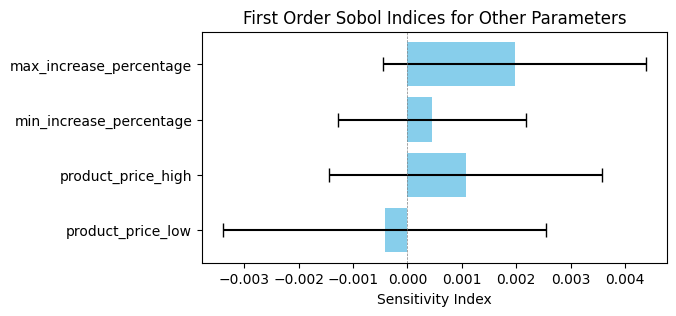

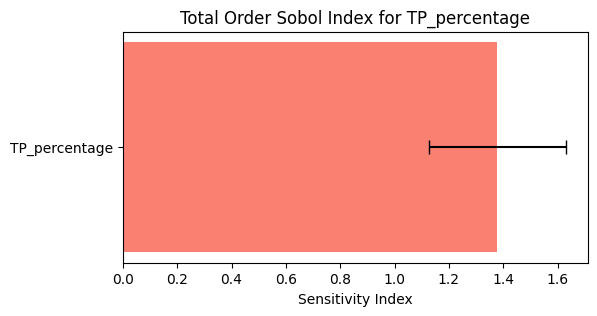

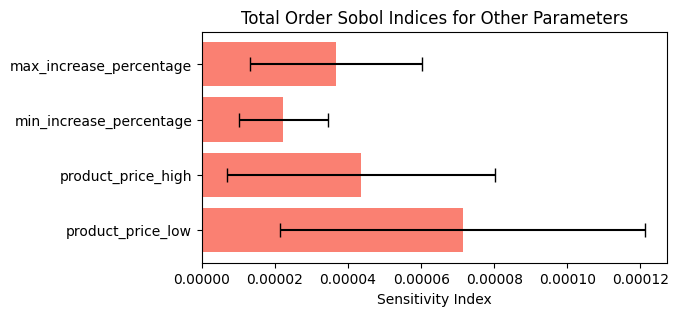

In [27]:


# First plot for First Order Index for TP_percentage
plt.figure(figsize=(6, 3))
plt.barh(['TP_percentage'], Si['S1'][0], xerr=Si['S1_conf'][0], align='center', color='skyblue', ecolor='black', capsize=5)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
plt.title('First Order Sobol Index for TP_percentage')
plt.xlabel('Sensitivity Index')
plt.show()

# Second plot for First Order Indices for the other parameters
plt.figure(figsize=(6, 3))
plt.barh(['product_price_low', 'product_price_high', 'min_increase_percentage', 'max_increase_percentage'], Si['S1'][1:], xerr=Si['S1_conf'][1:], align='center', color='skyblue', ecolor='black', capsize=5)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
plt.title('First Order Sobol Indices for Other Parameters')
plt.xlabel('Sensitivity Index')
plt.show()

# Third plot for Total Order Index for TP_percentage
plt.figure(figsize=(6, 3))
plt.barh(['TP_percentage'], Si['ST'][0], xerr=Si['ST_conf'][0], align='center', color='salmon', ecolor='black', capsize=5)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
plt.title('Total Order Sobol Index for TP_percentage')
plt.xlabel('Sensitivity Index')
plt.show()

# Fourth plot for Total Order Indices for the other parameters
plt.figure(figsize=(6, 3))
plt.barh(['product_price_low', 'product_price_high', 'min_increase_percentage', 'max_increase_percentage'], Si['ST'][1:], xerr=Si['ST_conf'][1:], align='center', color='salmon', ecolor='black', capsize=5)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)
plt.title('Total Order Sobol Indices for Other Parameters')
plt.xlabel('Sensitivity Index')
plt.show()



- `TP_percentage` has a dominant first-order effect on the model’s output, indicating its changes alone significantly impact the outcome.
- The other parameters (`product_price_low`, `product_price_high`, `min_increase_percentage`, `max_increase_percentage`) have minimal individual influence on the model’s output, with both first and total order indices near zero.
- The total order index for `TP_percentage` only slightly exceeds its first order index, suggesting that while interactions with other parameters exist, they do not dominate the output variance.
- Large confidence intervals for `TP_percentage` indicate significant uncertainty about its precise influence, yet it remains the most impactful parameter.
- Second-order effects show some interactions between parameters, but these are not as prominent as the individual impact of `TP_percentage`.